#Importación de Librerías

In [0]:
# Librería para manejo de matrices.
import numpy as np
# Librería para manejo de data en forma de tablas.
import pandas as pd
# Librería para hacer gráficas.
%matplotlib inline
import matplotlib.pyplot as plt
# Librería para hacer las gráficas más bonitas.
import seaborn as sns
sns.set()

In [7]:
#Con esto podemos utilizar archivos que se encuentren en nuestro Drive.
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


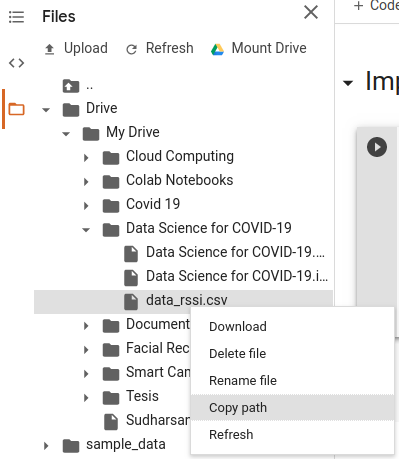

#Importación y Análisis de la Data

In [0]:
# Ubicación en el Drive de nuestro archivo que contiene la info recolectada.
path='/content/Drive/My Drive/Data Science for COVID-19/data_rssi.csv'

In [0]:
# Usamos pandas para trabajar con el archivo csv
data=pd.read_csv(path)

In [11]:
# Con head() vemos las primeras 5 filas.
data.head()

,RSSI,Incumplimiento
0,41,1
1,42,1
2,40,1
3,41,1
4,40,1


In [12]:
data.describe()

,RSSI,Incumplimiento
count,1612.000000,1612.000000
mean,53.991935,0.544665
std,13.922435,0.498156
min,29.000000,0.000000
25%,44.000000,0.000000
50%,52.000000,1.000000
75%,60.000000,1.000000
max,115.000000,1.000000


In [13]:
# Con describe() vemos la descripción estadística de la data.
#Descripción de las mediciones que incumplen con el aislamiento social
print("Incumplimiento de Distancia Social")
data['RSSI'].loc[data['Incumplimiento']==1].describe()

Incumplimiento de Distancia Social


count    878.000000
mean      45.379271
std        7.588978
min       29.000000
25%       39.000000
50%       45.000000
75%       50.000000
max       83.000000
Name: RSSI, dtype: float64

In [14]:
#Descripción de las mediciones que cumplen con el aislamiento social
print("Cumplimiento de Distancia Social")
data['RSSI'].loc[data['Incumplimiento']==0].describe()

Cumplimiento de Distancia Social


count    734.000000
mean      64.294278
std       12.726766
min       40.000000
25%       55.000000
50%       61.000000
75%       74.000000
max      115.000000
Name: RSSI, dtype: float64

(array([223., 420., 204.,  24.,   5.,   1.,   0.,   0.]),
 array([ 30,  40,  50,  60,  70,  80,  90, 100, 110]),
 <a list of 8 Patch objects>)

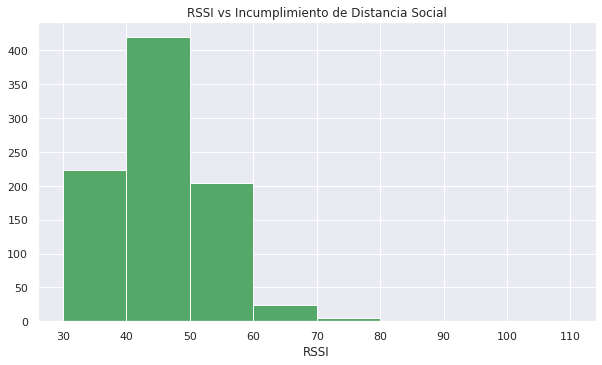

In [15]:
fig=plt.figure(figsize=(10,5.5))
plt.title("RSSI vs Incumplimiento de Distancia Social")
plt.xlabel("RSSI")
plt.hist(data['RSSI'].loc[data['Incumplimiento']==1],color='g',bins=[30,40,50,60,70,80,90,100,110])

(array([  0.,  72., 247., 185., 110.,  95.,  20.,   4.]),
 array([ 30,  40,  50,  60,  70,  80,  90, 100, 110]),
 <a list of 8 Patch objects>)

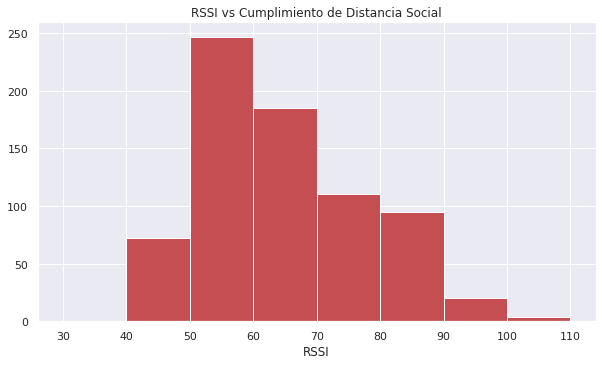

In [16]:
fig=plt.figure(figsize=(10,5.5))
plt.title("RSSI vs Cumplimiento de Distancia Social")
plt.xlabel("RSSI")
plt.hist(data['RSSI'].loc[data['Incumplimiento']==0],color='r',bins=[30,40,50,60,70,80,90,100,110])

Text(0.5, 1.0, 'RSSI con distancia de separación social menor a 1 m')

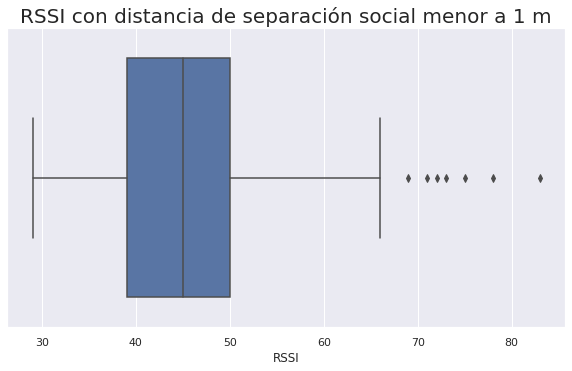

In [17]:
plt.figure(figsize=(10,5.5))
g=sns.boxplot(data['RSSI'].loc[data['Incumplimiento']==1],color='b')
g.set_title("RSSI con distancia de separación social menor a 1 m",fontdict={'size':20})

Text(0.5, 1.0, 'RSSI con distancia de separación social mayor a 1 m')

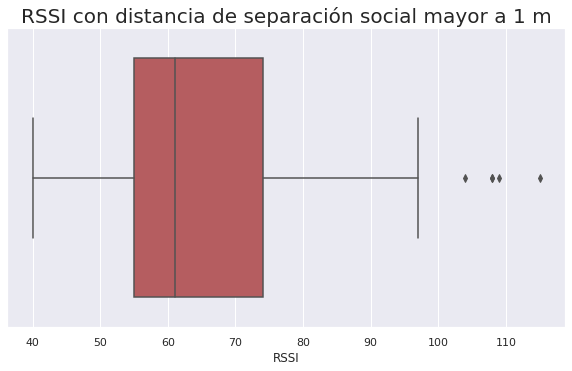

In [18]:
plt.figure(figsize=(10,5.5))
g=sns.boxplot(data['RSSI'].loc[data['Incumplimiento']==0],color='r')
g.set_title("RSSI con distancia de separación social mayor a 1 m",fontdict={'size':20})

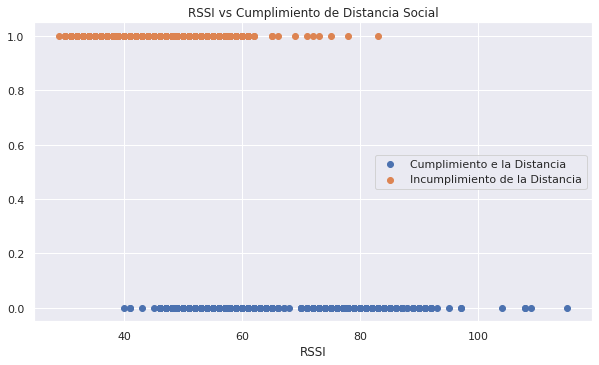

In [19]:
fig=plt.figure(figsize=(10,5.5))
plt.title("RSSI vs Cumplimiento de Distancia Social")
plt.scatter(data['RSSI'].loc[data['Incumplimiento']==0],data['Incumplimiento'].loc[data['Incumplimiento']==0])
plt.scatter(data['RSSI'].loc[data['Incumplimiento']==1],data['Incumplimiento'].loc[data['Incumplimiento']==1])
plt.xlabel("RSSI")
plt.legend(['Cumplimiento e la Distancia','Incumplimiento de la Distancia'])

#Redes Neuronales

In [0]:
#Importamos librería de Red Neuronal
import tensorflow as tf

In [21]:
#Creamos el modelo
x_NN=np.array(data['RSSI']).reshape(-1,1)
y_NN=np.array(data['Incumplimiento']).reshape(-1,1)
model=tf.keras.models.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1],activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_NN,y_NN,epochs=200)

Epoch 1/200
51/51 [==============================] - 0s 1ms/step - loss: 12.0683 - accuracy: 0.4553
Epoch 2/200
51/51 [==============================] - 0s 1ms/step - loss: 10.7521 - accuracy: 0.4553
Epoch 3/200
51/51 [==============================] - 0s 1ms/step - loss: 9.5713 - accuracy: 0.4553
Epoch 4/200
51/51 [==============================] - 0s 1ms/step - loss: 8.2451 - accuracy: 0.4553
Epoch 5/200
51/51 [==============================] - 0s 1ms/step - loss: 6.9519 - accuracy: 0.4553
Epoch 6/200
51/51 [==============================] - 0s 1ms/step - loss: 5.7053 - accuracy: 0.4553
Epoch 7/200
51/51 [==============================] - 0s 1ms/step - loss: 4.4576 - accuracy: 0.4553
Epoch 8/200
51/51 [==============================] - 0s 1ms/step - loss: 3.2071 - accuracy: 0.4553
Epoch 9/200
51/51 [==============================] - 0s 1ms/step - loss: 1.9507 - accuracy: 0.4553
Epoch 10/200
51/51 [==============================] - 0s 1ms/step - loss: 0.9803 - accuracy: 0.4553
Epoch 1

In [24]:
x_NN_RSSI=52

if model.predict([x_NN_RSSI]).reshape(-1,1)>0.5:
  print("1")
else:
  print("0")

1


#Generate a SavedModel

In [25]:
export_dir='saved_model/1'
tf.saved_model.save(model,export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


#Convert the SavedModel to TFLite

In [0]:
#Convert the model.
converter=tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model=converter.convert()

In [27]:
import pathlib
tflite_model_file=pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

816

#Initialize the TFLite Interpreter To Try It Out

In [0]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(1000):
    input_data = np.array(np.random.random_sample(input_shape)*100, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

#Visualize the Model

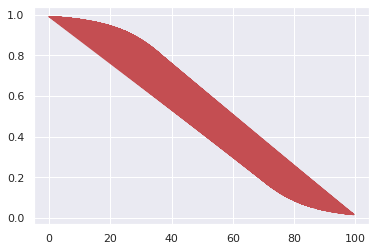

In [30]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()

#Download the TFLite Model File

In [0]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass